In [1]:
import pandas as pd
import numpy as np
import lex

In [2]:
df = pd.read_csv('data/df_filtered_tags.csv')

In [11]:
tag_list = ['data structures', 'dp', 'greedy', 'geometry']

In [5]:
# df_ = df[df['tag'].isin(tag_list)]


In [8]:
# df_.to_csv('data/df_filtered_tags.csv')

In [5]:
res = df.groupby('problem_id')
id_to_cnt = {pr_id: cnt for pr_id, cnt in res.size().sort_values().iteritems()}
id_to_tag = {row[1]['problem_id'] : row[1]['tag'] for row in df.iterrows()}

In [6]:
tags = set(df['tag'])
tag_to_problem_list = {t:{'problem_list' : [], 'cnt' : 0} for t in tags}
for pr, cnt in id_to_cnt.items():
    tag = id_to_tag[pr]
    tag_to_problem_list[tag]['problem_list'].append(pr)
    tag_to_problem_list[tag]['cnt'] += cnt

In [7]:
tmpdf = df[df['cnt'] > 100]
len(set(tmpdf['problem_id']))
# tmpdf = tmpdf[tmpdf['cnt'] < 200]
# # tmpdf[tmpdf['tag'] == 'sortings'] #163, 41, 439
# pr_list = [163, 41, 439]
# id_to_cnt

160

In [41]:
# tmpdf = tmpdf[tmpdf['problem_id'].isin(pr_list)]
# len(tmpdf)

In [42]:
# tmpdf = tmpdf.reset_index()
# # tmpdf[tmpdf['problem_id'] == 163]

In [8]:
tags_df = pd.DataFrame.from_dict(tag_to_problem_list, orient='index').reset_index()
tag_list = list(tags_df.sort_values(['cnt'], ascending=False)[:7]['index'])

In [83]:
# pr_df = pd.DataFrame.from_dict(id_to_cnt, orient='index').reset_index()
# pr_list = list(pr_df.sort_values([0], ascending=False)['index'][:20])
# pr_list
# # pr_df
# # tag_list

In [64]:
# tag_list

In [9]:
def get_train_test():
    train_ids, test_ids = [], []
    for t in tag_list:
        pr_list = tag_to_problem_list[t]['problem_list']
        total = len(pr_list)
#         print(t, total)
        if t == 'greedy':
            total -= 13
        bound = int(total * 0.5)
        train_ids.append(pr_list[bound:total])
        test_ids.append(pr_list[:bound])
    train_ids = [a for b in train_ids for a in b]
    test_ids = [a for b in test_ids for a in b]
    
    return train_ids, test_ids

train_ids, test_ids = get_train_test()

In [10]:
train_df = df[df['problem_id'].isin(train_ids)]
test_df = df[df['problem_id'].isin(test_ids)]

In [11]:
# train_df, test_df = test_df, train_df
len(train_df), len(test_df)

(91184, 11396)

In [8]:
# tmpdf = df[df['problem_id'].isin(pr_list)]
# train_df, test_df = tmpdf[::2], tmpdf[1::2]

In [12]:
# # test_df.groupby('problem_id').size(), train_df.groupby('problem_id').size()
# # just check 
ids_train = set(train_df['submission_id'])
ids_test = set(test_df['submission_id'])
ids_train.intersection(ids_test)
# # train_df.columns

set()

In [14]:
# train_df.to_csv('train_df.csv')
# test_df.to_csv('test_df.csv')
# len(set(train_df['problem_id'])), len(set(test_df['problem_id']))

In [13]:
lexer = lex.create_lexer()

In [14]:
train_df.groupby(['tag']).size()

tag
data structures    17924
dp                 27294
geometry           16565
greedy             29401
dtype: int64

In [15]:
eos = '_EOS_'
bos = '_BOS_'
def build_vocab(data):
    tokens = set()
    for s in data:
        lexer.input(s)
        for t in lexer:
            tokens.add(t.value)
    return tokens

comment_types = ['LINE_COMMENT', 'AREA_COMMENT', 'AREA_COMMENT_CONTINUE']
def get_token_list(data):
    lexer.input(data)
    return np.array([[t.value, t.type] for t in lexer if t.type not in comment_types])
    return pd.Series([tokens[:,0], tokens[:,1]])
# get_token_list('a b c')
train_df['tokens'] = train_df['source'].apply(get_token_list)
# all_tokens = np.array([a for b in train_df['tokens'] for a in b] + [[eos, 'NONE'], [bos, 'NONE']])
# all_tokens.shape

/home/sdeml/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
train_df['token_tuples'] = train_df['tokens'].apply(lambda r : [tuple(cur) for cur in r])

/home/sdeml/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
# train_df = train_df.reset_index()
# train_df['tokens'].in
# train_df
# tok_to_ty
all_tokens_map = {}
for r in train_df['token_tuples']:
#     tmp = [tuple(cur) for cur in r]
#     print(tmp)
#     break
    r_ = set(r)
#     break
#     print(r_) 
#     break
    for t in r_:
#         cur = set()
        if t not in all_tokens_map:
            all_tokens_map[t] = 1
        else:
#             cur.add(t[0])
            all_tokens_map[t] += 1
#         all_tokens.add(t[0]) # ignore token type
len(all_tokens_map)

70417

In [18]:
all_tokens_map_filtered = set(k for k, v in all_tokens_map.items() if v > 1)
# all_tokens_map_filteres = {k : v for k, v in all_tokens_map.items() if v > 1}
len(all_tokens_map_filtered)

35022

In [19]:
unk = '__UNK__'
for tok_type in lex.tokens:
    cur = (unk, tok_type)
    all_tokens_map_filtered.add(cur)

In [20]:
len(all_tokens_map_filtered)

35038

In [21]:
# # train_df
# # tok_to_ty
# all_tokens = set()
# for r in train_df['tokens']:
#     for t in r[:, 0]:
#         all_tokens.add(t) # ignore token type
# len(all_tokens)
token_types = list(lex.tokens)
token_types.append('UNKNOWN')

In [22]:
# all_tokens.add(eos)
# all_tokens.add(bos)
all_tokens_map_filtered.add((eos, 'UNKNOWN'))
all_tokens_map_filtered.add((bos, 'UNKNOWN'))

In [23]:
token_values_all = set(t[0] for t in all_tokens_map_filtered)
token_types_all = set(t[1] for t in all_tokens_map_filtered)
len(token_values_all), len(token_types_all)

(35025, 17)

In [87]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(all_tokens)
# list(all_tokens)[:100]

In [88]:
# def get_one_hot(token_list):
#     '''
#     token_list -- list of [token_value, token_type]
#     returns matrix [len(token_list) x one_hot_size]
#     '''
#     return enc.transform(token_list).toarray()

In [24]:
# train_X = np.array([get_one_hot(l) for l in train_df['tokens']])
# # train_X
# # enc.transform(train_df['tokens'][0]).to
# # len(train_df['tokens'][0])
for tok_type in lex.tokens:
    token_values_all.add(tok_type)

In [25]:
token_to_id = {t:i for i,t in enumerate(token_values_all)}
token_type_to_id = {t:i for i,t in enumerate(token_types_all)}


In [92]:
# token_to_id = {t:i for i,t in enumerate(all_tokens)}
# token_to_id = {t:i for i,t in enumerate(all_tokens_map_filtered)}
# all_tokens_map_filtered
# for el, i in enumerate(all_tokens_map_filtered):
#     print(el, i)
#     break

# len(cc)
# len(train_df)

72777

In [26]:
def to_matrix(data):
    # 00..100..0 | 00..100..0 might be better than 000..010..00
    # len(tokens)| len(token_types)             len(tokens) + len(token_types)
    # ignore token type for now
    max_len = max(map(lambda x : len(x[:,0]), data))
    matrix = np.zeros((len(data), max_len), dtype='int32') + token_to_id[eos]
    for i, seq in enumerate(data):
        tokens = seq#[:, 0]
        row_ix = list(map(lambda x : token_to_id[x[0]] if x[0] in token_to_id else token_to_id[x[1]], tokens))[:max_len]
        matrix[i, :len(row_ix)] = row_ix
    return matrix
to_matrix(train_df['tokens'][:2]).shape


(2, 1094)

In [17]:
# def to_matrix(data):
#     # ignore token type for now
#     max_len = max(map(lambda x : len(x[:,0]), data))
#     matrix = np.zeros((len(data), max_len), dtype='int32') + token_to_id[eos]
#     for i, seq in enumerate(data):
#         tokens = seq[:, 0]
#         row_ix = list(map(lambda x : token_to_id[x], tokens))[:max_len]
#         matrix[i, :len(row_ix)] = row_ix
#     return matrix
# to_matrix(train_df['tokens'][:2]).shape
# # train_df['tokens'][0][:,0]

(2, 1094)

--- Model

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

cuda = torch.device('cuda:0') 

In [28]:
from models import *

In [21]:
# def infer_mask(seq, eos_ix, batch_first=True, include_eos=True, dtype=torch.float):
#     """
#     compute length given output indices and eos code
#     :param seq: tf matrix [time,batch] if batch_first else [batch,time]
#     :param eos_ix: integer index of end-of-sentence token
#     :param include_eos: if True, the time-step where eos first occurs is has mask = 1
#     :returns: lengths, int32 vector of shape [batch]
#     """
#     assert seq.dim() == 2
#     is_eos = (seq == eos_ix).to(dtype=torch.float)
#     if include_eos:
#         if batch_first:
#             is_eos = torch.cat((is_eos[:,:1]*0, is_eos[:, :-1]), dim=1)
#         else:
#             is_eos = torch.cat((is_eos[:1,:]*0, is_eos[:-1, :]), dim=0)
#     count_eos = torch.cumsum(is_eos, dim=1 if batch_first else 0)
#     mask = count_eos == 0
#     return mask.to(dtype=dtype)

# def infer_length(seq, eos_ix, batch_first=True, include_eos=True, dtype=torch.long):
#     """
#     compute mask given output indices and eos code
#     :param seq: tf matrix [time,batch] if time_major else [batch,time]
#     :param eos_ix: integer index of end-of-sentence token
#     :param include_eos: if True, the time-step where eos first occurs is has mask = 1
#     :returns: mask, float32 matrix with '0's and '1's of same shape as seq
#     """
#     mask = infer_mask(seq, eos_ix, batch_first, include_eos, dtype)
#     return torch.sum(mask, dim=1 if batch_first else 0)


In [29]:
# class BasicModel(nn.Module):
#     def __init__(self, inp_voc_len, emb_size, hid_size, out_size):
#         super(self.__class__, self).__init__()
#         self.inp_voc_len = inp_voc_len
#         self.eos_ix = token_to_id[eos]
#         self.emb_inp = nn.Embedding(inp_voc_len, emb_size)

#         self.enc0 = nn.LSTM(emb_size, hid_size, batch_first=True)
#         self.outs = nn.Linear(hid_size, hid_size)
#         self.logits = nn.Linear(hid_size, out_size)

#     def forward(self, inp, eps=1e-30, **flags):
#         batch_size = inp.shape[0]
        
#         inp_emb = self.emb_inp(inp)
#         self.enc0.flatten_parameters()
#         enc_seq, _ = self.enc0(inp_emb)

#         end_index = infer_length(inp, self.eos_ix)
#         end_index[end_index >= inp.shape[1]] = inp.shape[1] - 1
#         enc_last = enc_seq[range(0, enc_seq.shape[0]), end_index.detach(), :]

#         hid_state = self.outs(enc_last)

#         logits_seq = self.logits(hid_state)

#         return logits_seq
class StackedLSTMModel(nn.Module):
    def __init__(self, inp_voc_len, eos_ix, emb_size, hid_size, out_size):
        super(self.__class__, self).__init__()
        self.inp_voc_len = inp_voc_len
        self.eos_ix = eos_ix
        self.emb_inp = nn.Embedding(inp_voc_len, emb_size)

        self.enc0 = nn.LSTM(emb_size, hid_size, num_layers=2, batch_first=True)
        self.outs = nn.Linear(hid_size, hid_size)
        self.logits = nn.Linear(hid_size, out_size)

    def forward(self, inp, eps=1e-30, **flags):
        batch_size = inp.shape[0]

        inp_emb = self.emb_inp(inp)
        # self.enc0.flatten_parameters()
        enc_seq, _ = self.enc0(inp_emb)

        end_index = infer_length(inp, self.eos_ix)
        end_index[end_index >= inp.shape[1]] = inp.shape[1] - 1
        enc_last = enc_seq[range(0, enc_seq.shape[0]), end_index.detach(), :]

        hid_state = self.outs(enc_last)

        logits_seq = self.logits(hid_state)

        return logits_seq

In [65]:
class BasicLSTMModel(nn.Module):
    def __init__(self, inp_voc_len, eos_ix, emb_size, hid_size, out_size):
        super(self.__class__, self).__init__()
        self.inp_voc_len = inp_voc_len
        self.eos_ix = eos_ix
        self.emb_inp = nn.Embedding(inp_voc_len, emb_size)

        self.enc0 = nn.LSTM(emb_size, hid_size, batch_first=True)
        self.outs = nn.Linear(hid_size, hid_size)
        self.logits = nn.Linear(hid_size, out_size)

    def forward(self, inp, eps=1e-30, **flags):
        batch_size = inp.shape[0]

        inp_emb = self.emb_inp(inp)
        # self.enc0.flatten_parameters()
        enc_seq, _ = self.enc0(inp_emb)

        end_index = infer_length(inp, self.eos_ix)
        end_index[end_index >= inp.shape[1]] = inp.shape[1] - 1
        enc_last = enc_seq[range(0, enc_seq.shape[0]), end_index.detach(), :]

        hid_state = self.outs(enc_last)

        logits_seq = self.logits(hid_state)

        return logits_seq

class BasicBiLSTMModel(BasicLSTMModel):
    def __init__(self, inp_voc_len, eos_ix, emb_size, hid_size, out_size):
        nn.Module.__init__(self)
        self.inp_voc_len = inp_voc_len
        self.eos_ix = eos_ix
        self.emb_inp = nn.Embedding(inp_voc_len, emb_size)

        self.enc0 = nn.LSTM(emb_size, hid_size, bidirectional=True, batch_first=True)
        self.outs = nn.Linear(2 * hid_size, hid_size)
        self.logits = nn.Linear(hid_size, out_size)


In [30]:
# class AttentionLSTMModel(nn.Module):
#     def __init__(self, inp_voc_len, eos_ix, emb_size, hid_size, out_size):
#         super(self.__class__, self).__init__()
#         self.hid_size = hid_size
#         self.inp_voc_len = inp_voc_len
#         self.eos_ix = eos_ix
#         self.emb_inp = nn.Embedding(inp_voc_len, emb_size)

#         self.enc0 = nn.LSTMCell(emb_size, hid_size)
#         self.attn = nn.Linear(hid_size, 1)
#         self.outs = nn.Linear(hid_size, hid_size)
#         self.logits = nn.Linear(hid_size, out_size)

#     def forward(self, inp, eps=1e-30, **flags):
#         batch_size = inp.shape[0]

#         inp_emb = self.emb_inp(inp) # shape [batch_size x seq_len x emb_size]
        
#         hidden_states = []
#         coeffs = [] # each coef is batch_size
#         h_st = torch.zeros(batch_size, self.hid_size).to(device=cuda)
#         c_st = torch.zeros(batch_size, self.hid_size).to(device=cuda)

#         for inp_ in inp_emb.transpose(1, 0): # shape [seq_len x batch_size x emb_size]
#             h_st, c_st = self.enc0(inp_, (h_st, c_st))
#             hidden_states.append(h_st)
#             coeffs.append(self.attn(h_st))
#         print(len(coeffs))
#         print(coeffs[0])
#         return
# #         print(inp_emb_.shape)
#         # self.enc0.flatten_parameters()
#         enc_seq, _ = self.enc0(inp_emb)

#         end_index = infer_length(inp, self.eos_ix)
#         end_index[end_index >= inp.shape[1]] = inp.shape[1] - 1
#         enc_last = enc_seq[range(0, enc_seq.shape[0]), end_index.detach(), :]

#         hid_state = self.outs(enc_last)

#         logits_seq = self.logits(hid_state)

#         return logits_seq

In [30]:
%load_ext autoreload
%autoreload 2

In [31]:
from models import BasicBiLSTMModel as BasicBiLSTMModel_

In [32]:
pr_list = list(set(train_df['problem_id']))

In [30]:
# from models import *
def get_tag_id(log_probas):
    return tag_list[log_probas.argmax()]

In [32]:
def get_pr_id(log_probas):
    return pr_list[log_probas.argmax()]

In [35]:
import inspect

In [89]:
# inspect.getsource(BasicBiLSTMModel)

In [67]:
model_ = BasicLSTMModel(len(token_to_id), eos_ix=token_to_id[eos], emb_size=128, hid_size=256, out_size=len(tag_list)).to(device=cuda)
# model_ = AttentionLSTMModel(len(token_to_id), eos_ix=token_to_id[eos], emb_size=128, hid_size=256, out_size=len(tag_list)).to(device=cuda)
# len(token_to_id)

In [31]:
model_ = StackedLSTMModel(len(token_to_id), eos_ix=token_to_id[eos], emb_size=128, hid_size=512, out_size=len(tag_list)).to(device=cuda)

In [32]:
len(token_to_id)

35040

In [24]:
# model_ = nn.DataParallel(BasicModel(len(token_to_id), emb_size=128, hid_size=256, out_size=len(tag_list)).to(device=cuda))

In [33]:
# tmptmp = to_matrix(train_df['tokens'][:5])
inp = torch.tensor(to_matrix(train_df['tokens'][:5]), dtype=torch.int64).to(device=cuda)
get_tag_id(model_.forward(inp)[0])
# model_.forward(inp)

'greedy'

In [34]:
# # tag_to_id = {i:t for t, i in enumerate(tag_list)}
pr_list = list(set(train_df['problem_id']))
# type(pr_list)

In [35]:
# tags_df = df[df['tag'].isin(tag_list)]
# len(tags_df)
# pr_to_id = {i:t for t, i in enumerate(pr_list)}
tag_to_id = {i:t for t, i in enumerate(tag_list)}

In [26]:
# yys = train_df['tag'][:5]
# # yys_id = torch.tensor([tag_to_id[ix] for i, ix in enumerate(yys)], dtype=torch.int64)
# yys_id = torch.tensor([2, 1, 2, 1, 2], dtype=torch.int64)
# # yys_id
# loss = nn.CrossEntropyLoss()
# loss(model.forward(inp), yys_id)
# # model.forward(inp).argmax(dim=1)
# # tmp_, tmp_[:, yys_id]
# # cnt = 0
# # for i, row in enumerate(tmp_):
# #     cnt += row[yys_id[i]]
# # cnt

model training

In [36]:
def compute_loss_on_batch(input_sequence, reference_answers):
    input_sequence = torch.tensor(to_matrix(input_sequence), dtype=torch.int64).to(device=cuda)

    logprobs_seq =  model_.forward(input_sequence)
    loss = nn.CrossEntropyLoss()
    ans = torch.tensor([tag_to_id[ix] for i, ix in enumerate(reference_answers)], dtype=torch.int64).to(device=cuda)
    return loss(logprobs_seq, ans)

In [37]:
compute_loss_on_batch(train_df['tokens'][:32], train_df['tag'][:32])

tensor(1.4016, device='cuda:0', grad_fn=<NllLossBackward>)

In [38]:
from IPython.display import clear_output
from tqdm import tqdm, trange  # or use tqdm_notebook,tnrange
import matplotlib.pyplot as plt
%matplotlib inline

REPORT_FREQ = 10
loss_history = []
editdist_history = []
entropy_history = []
opt = torch.optim.Adam(model_.parameters())

In [39]:
# train_df = train_df[['id', 'submission_id', 'problem_id',
#        'source', 'verdict', 'author_id', 'time', 'tag', 'cnt', 'tokens']]
# train_df = train_df.reset_index()
train_df = train_df.reset_index()
# set(train_df['problem_id'])

In [40]:
def sample_batch(df, batch_size):
    idxs = np.random.choice(len(df), size=batch_size)
    return df['tokens'][idxs], df['tag'][idxs]
#     return df['tokens'][idxs], df['tag'][idxs]

llh=0.044


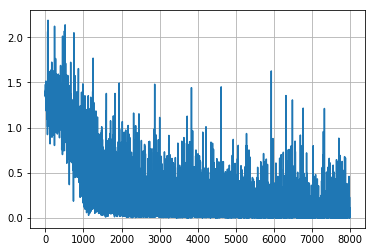

100%|██████████| 4000/4000 [09:54<00:00,  6.39it/s]


In [50]:
for i in trange(4000):
    loss = compute_loss_on_batch(*sample_batch(train_df, 10))

    loss.backward()
    opt.step()
    opt.zero_grad()

    loss_history.append(loss.item())

    if (i+1) % 10 == 0:
        clear_output(True)
        print("llh=%.3f" % (np.mean(loss_history[-10:])))
        plt.plot(loss_history)
        plt.grid()
        plt.show()
#     if (i+1) % 1000 == 0:
#         torch.save(model.state_dict(), 'tags_biLSTM_same{0}.pt'.format(i))

In [45]:
# plt.plot(loss_history)
# plt.grid()

In [42]:
# test_df_ = test_df[::4]
# # test_df_.groupby(['tag']).size()
# len(test_df_)
test_df_ = test_df.reset_index()
len(test_df_)

11396

In [40]:
# set(train_df['problem_id']).intersection(test_df['problem_id'])

In [43]:
# test_df['source']
test_df = test_df[['id', 'submission_id', 'problem_id',
       'source', 'verdict', 'author_id', 'time', 'tag', 'cnt']]
# test_df.reset_index()

In [44]:
test_df_['tokens'] = test_df_['source'].apply(get_token_list)

In [45]:
test_df = test_df.reset_index()

In [46]:
# for s in test_df['tokens']:
def test_row_to_matrix(seq):
#     tokens = [t for t in seq[:, 0] if t in token_to_id]
#     print(len(seq), len(tokens))
#     row_ix = list(map(lambda x : token_to_id[x], tokens))[:max_len]
    # ignore token type for now
#     max_len = max(map(lambda x : len(x[:,0]), data))
    matrix = np.zeros((1, len(seq)), dtype='int32') + token_to_id[eos]
#     matrix[0, :len(tokens)] = list(map(lambda x : token_to_id[x], tokens))
    matrix[0, :len(seq)] = list(map(lambda x : token_to_id[x[0]] if x[0] in token_to_id else token_to_id[x[1]], seq))
    return matrix
# to_matrix(test_df['tokens'][:2])

In [47]:
# test_row_to_matrix(test_df['tokens'][0])
test_df_['inps'] = test_df_['tokens'].apply(test_row_to_matrix)

In [51]:
def get_ans(inp):
    inp = torch.tensor(inp, dtype=torch.int64).to(device=cuda)
    probas = model_.forward(inp)
    return tag_list[probas.argmax()]
# test_df['inps']
# inp_ = torch.tensor(test_df['inps'][0], dtype=torch.int64)
# probas_ = model.forward(inp_)
# pr_list[probas_.argmax()], test_df['problem_id'][0]
pred_y = test_df_['inps'].apply(get_ans)

In [88]:
np.sum(pred_y == test_df_['tag']) / len(test_df_)

0.7664092664092664

In [53]:
# len(set(test_df_['problem_id']))
np.sum(pred_y == test_df_['tag']) / len(test_df_)

0.8366970866970866

In [66]:
# train_df['inps'].apply(get_ans)
# train_df['inps'] = train_df['tokens'].apply(test_row_to_matrix)
np.sum(pred_y == test_df_['problem_id']) / len(test_df_)

0.942659668022425

In [56]:
# pred_y = train_df['inps'].apply(get_ans)
np.sum(pred_y == test_df_['tag']) / len(test_df_)

0.8233590733590733

In [77]:
np.sum(pred_y == test_df_['tag']) / len(test_df_)

0.966932879285415

In [70]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(test_df_['problem_id'], pred_y)

In [48]:
len(test_df)

4945

In [63]:
torch.save(model_.state_dict(), 'LSTM_160_problems.pt')